# **Descriptive Statistics**
---
 
- Copyright (c) Antoine Jacquier (QuantLearn Ltd), 2022. All rights reserved

- Author: Antoine Jacquier <Jack.QuantLearn@gmail.com>

- Platform: Tested on Windows 10 with Python 3.9

In [122]:
from scipy.interpolate import interp1d
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import requests
import urllib

In [123]:
dls = "http://www.cboe.com/micro/buywrite/dailypricehistory.xls"
filename = 'values.xls'
resp = urllib.request.urlretrieve(dls, filename)

In [124]:
df = pd.read_excel(filename)

In [125]:
df.columns = [df.iloc[3, i]  for i in range(len(df.columns))]
df = df.rename(columns={df.columns[0]: 'Date'})
df = df.drop([0,1,2,3])
df.index = df['Date']
df = df.drop(columns=df.columns[0])
df.head()

,BXMSM,SPTR,SPXSM,PUTSM,CLL*,BXYSM,VIX®,VXOSM,BXMDSM,BFLYSM,CLLZSM,CMBOSM,CNDRSM,PPUTSM
Date,,,,,,,,,,,,,,
1986-06-30 00:00:00,92.2055,NaN,250.84,89.9139,100,NaN,NaN,18.31,100,100,100,100,100,100
1986-07-01 00:00:00,92.5688,NaN,252.04,90.0581,100.48,NaN,NaN,17.85,100.47,100.01,100.43,100.32,100.15,100.46
1986-07-02 00:00:00,92.6135,(scroll down),252.7,90.214,100.62,(scroll down),(scroll down),17.4,100.64,99.83,100.58,100.49,100.22,100.72
1986-07-03 00:00:00,92.819,NaN,251.79,90.1589,100.49,NaN,NaN,17.56,100.65,100.83,100.56,100.47,100.24,100.37
1986-07-07 00:00:00,90.9857,NaN,244.05,88.8831,98.26,NaN,NaN,18.87,98.02,100.24,98.39,98.43,99.55,97.45


In [126]:
print(df.columns)

Index(['BXMSM', 'SPTR', 'SPXSM', 'PUTSM', 'CLL*', 'BXYSM', 'VIX® ', 'VXOSM',
       'BXMDSM ', 'BFLYSM ', 'CLLZSM ', 'CMBOSM ', 'CNDRSM ', 'PPUTSM '],
      dtype='object')


In [128]:
df2 = df[[df.columns[2], df.columns[6]]]
df2 = df2.dropna()
df2 = df2[1:]
df2.columns = ["SPX", "VIX"]
df2.head()


,SPX,VIX
Date,,
1990-01-02 00:00:00,359.69,17.24
1990-01-03 00:00:00,358.76,18.19
1990-01-04 00:00:00,355.66,19.22
1990-01-05 00:00:00,352.2,20.11
1990-01-08 00:00:00,353.79,20.26


In [130]:
df = df2
for i in range(len(df.columns)):
    df[df.columns[i]] = pd.to_numeric(df[df.columns[i]])
df.describe()

,SPX,VIX
count,7447.000000,7447.000000
mean,1241.253627,19.202425
std,642.414907,7.759176
min,295.460000,9.140000
25%,795.510000,13.580000
50%,1185.870000,17.300000
75%,1466.630000,22.590000
max,3025.860000,80.860000


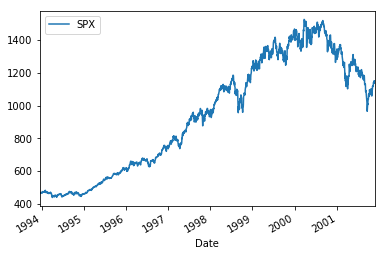

In [131]:
#df[['VIX', 'VXO']].plot()
a, b = 1000, 3000
df = df[a:b]
df[['SPX']].plot()

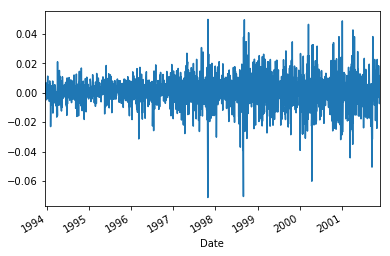

In [133]:
df['returnsSPX'] = np.log(df['SPX'] / df['SPX'].shift(1))
df = df.dropna() ##df.drop(df.index[0]) ## Drop the first line with NaN
df['returnsSPX'].plot();

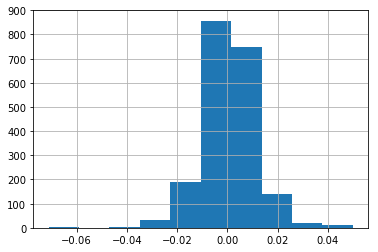

In [134]:
df['returnsSPX'].hist();

C:\Users\ajacquie\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


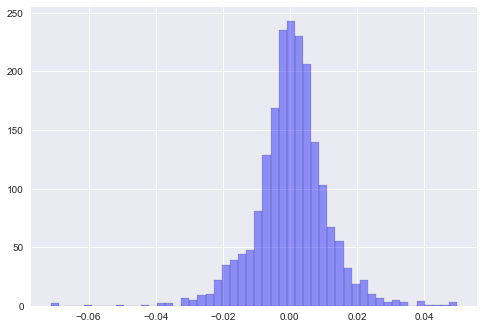

In [135]:
import seaborn as sns
sns.distplot(df['returnsSPX'].values[1:], hist=True, kde=False, color = 'blue',hist_kws={'edgecolor':'black'});

In [138]:
import scipy.stats as scs
def normality_tests(arr):
    print("Skew of data set %f" % scs.skew(arr))
    print("Skew test p-value %f" % scs.skewtest(arr)[1])
    print("Kurt of data set %f" % scs.kurtosis(arr))
    print("Kurt test p-value %f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %f" % scs.normaltest(arr)[1])
    
normality_tests(df['returnsSPX'].values)

Skew of data set -0.300148
Skew test p-value 0.000000
Kurt of data set 4.151531
Kurt test p-value 0.000000
Norm test p-value 0.000000
